# Трехмерная геометрия и градиентный спуск

## Трехмерная геометрия

### Теоретическая часть (напоминание)

* В школьных курсах прямая на плоскости задается уравнением $y=kx + b$. Здесь $k$ отвечает за наклон прямой, а $b$ - за смещение по оси ординат.   
  В аналитической геометрии прямую обычно задают уравнением $ax + by + c = 0$. Это более общий случай: в таком виде можно в том числе задать прямую, параллельную оси ординат, установив $b=0$.    
  В этом отличие от уравнения $y=kx + b$: здесь коэффициент при $y$ равен 1, и прямую, параллельную оси ординат, задать нельзя.
* Уравнение плоскости в трехмерном пространстве задается аналогично: $ax + by +cz + d = 0$. Любую плоскость можно задать таким уравнением, причем не единственным образом. Обобщим уравнение на произвольную размерность: $w_1 x_1 + \dots w_d x_d + w_0 = 0$. 
* Гиперплоскость $w_1 x_1 + \dots w_d x_d + w_0 = 0$ задается в пространстве размерности $d+1$.
* Если коэффициент $w_i=0$, гиперплоскость параллельна $i$-й оси.
* Если свободный член $w_0=0$, гиперплоскость проходит через начало координат $(0, \dots,  0)$.

### Практическая часть: визуализация функции двух переменных

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

Имеется функция, реализующая построение *3d*-поверхности, и, дополнительно (при задании параметра), - ломаной линии в той же системе координат.

#### **Задание 1**
Разобраться (по коду), как работает эта функция.

In [3]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
  """
  Визуализирует функцию fun в квадрате [a, b] x [c, d]
  fun : функция, принимающая два аргумента 
        (np.array одинакового размера) и возвращающая
         np.array того же размера со значениями функции
         в соответствующих точках
  Дополнительно возможно нарисовать ломаную линию из N точек,
  лежащую на получившейся поверхности
  trace : np.array размера N x 2 - координаты на плоскости,
  обозначающие точки ломаной
  """
  fig = plt.figure()

  # Создание сетки
  x1_ = np.linspace(a, b, 100)
  x2_ = np.linspace(c, d, 100)
  x1, x2 = np.meshgrid(x1_, x2_)
  y = fun(x1, x2)

  # Построение поверхности
  ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.plot_surface(x1, x2, y, alpha=0.6)
  ax.contour(x1, x2, y, zdir='z', offset=y.min(), cmap=cm.coolwarm)
    
  # Построение 3d-линии 
  if trace is not None:
    y_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
    ax.set_xlim(x1.min(), x1.max())
    ax.set_ylim(x2.min(), x2.max())
    ax.set_zlim(y.min(), y.max())

Для примера, отобразим эллиптический параболоид ("трехмерную параболу"):

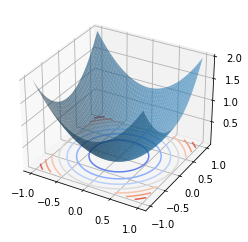

In [4]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Окружности на плоскости $Ox_1x_2$ показывают проекции линий уровня поверхности.

#### **Задание 2**
1. Визуализировать плоскость $y = x_1 + 2 x_2 + 3$
2. Визуализировать плоскость, параллельную любой из осей координат
3. Визуализировать плоскость, проходящую через начало координат

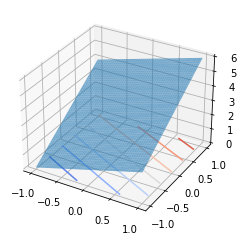

In [5]:
# ваш код
# плоскость y = x1 + 2*x2 + 3
fun = lambda x1, x2: x1 + 2*x2 + 3
plot_3d(fun)

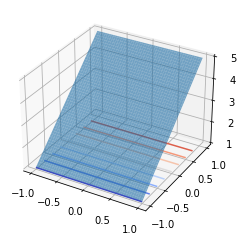

In [6]:
# ваш код
# плоскость, параллельная оси координат (укажите, какой именно)
fun = lambda x1, x2: 2*x2 + 3
plot_3d(fun)
#Параллельно оX

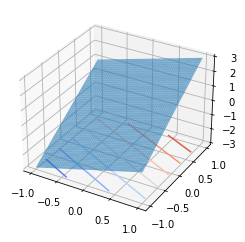

In [7]:
# ваш код
# плоскость, проходящая через начало координат
fun = lambda x1, x2: x1 + x2*2
plot_3d(fun)

## Градиентный спуск

### Теоретическая часть

Градиент функции $f(x) = f(x_1, \dots, x_d)$ многих переменных в точке $x_0$ - это вектор ее частных производных, вычисленных в точке $x_0$.
$$\nabla_x f \bigl | _{x_0} = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_d} \biggr ) \biggl | _{x_0}$$

Разберем два простых примера вычисления градиента в случае функции от двух переменных.

#### Задача 1

Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__

Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1 + c_2 x_2)}{\partial x_1} = c_1.$$

Значит, первая компонента градиента равна $c_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (c_1, c_2)$$

Можно подставить конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. Тогда градиент будет равен $(3, 7)$. 

#### Задача 2
Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__
Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1^2 + c_2 x_2^2)}{\partial x_1} = 2 c_1 x_1.$$

Значит, первая компонента градиента равна $2 c_1 x_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Следующая цель - найти этот минимум с помощью градиентного спуска. 

__Вспомнить из лекции:__
* Какую (оптимизационную) задачу решает градиентный спуск?


* Как работает алгоритм градиентного спуска?


* Как выбирать начальную инициализацию в градиентном спуске?


* Когда останавливать градиентный спуск?

__Ниже кратко запишите ответы на вопросы__:
* Грандиетный спуск решает задачу нахождения минимального значения функции потерь
* Градиентый спуск работает выбирая случайную точку, идет в направлении антиградиента и повторяет шаг до достижения точки минимума
* В грандиентом спуске мы выбираем 0 инициализацию.
* Останавливать грандиентный, когда значения длины вектора градиента становиться ближе к нулю  или $[w^t -w^{t-1}] < \epsilon $

### Практическая часть

Воспользуемся кодом задания квадратичной функции (выше) и обобщим ее на случай произвольных коэффициентов:

In [8]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Эта функция способна обрабатывать $x_1$ и $x_2$ любой размерности, но градиенты будем считать в предположении, что $x_1$ и $x_2$ - скаляры.

#### **Задание 3**

1. Реализовать вычисление градиента функции `fun` в заданной точке. 
2. Протестировать функцию `grad_fun`.

In [9]:
def grad_fun(x1, x2, c1=1, c2=1):
  """
  Функция принимает 2 числа - координаты точки, в которой нужно вычислить градиент,
  и возвращает np.array размерности (2,) - градиент квадратичной функции
  Опциональные аргументы: c1 и c2 - коэффициенты
  """
  ### ваш код
  return np.array([2*x1*c1,2*x2*c2])

In [10]:
# тестирование

grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([2., 9.])

### Реализация градиентного спуска
Алгоритм: 
1. Инициализация начальной точки x (в коде ниже реализован случайный выбор точки)
1. Итеративно:
$$x = x - \alpha \nabla_x f$$
Здесь $\alpha$ - длина шага.


#### **Задание 4**
Дописать код метода, реализующего градиентный спуск для квадратичной функции.

In [11]:
def grad_descend(grad_fun, step_size=0.1, num_steps=20):
  """
  Реализует градиентный спуск
  Аргументы:
  * grad_fun - функция, вычисляющая градиент
  * step_size - длина шага
  * num_steps - число итераций
    
  Возвращает np.array размера (num_steps+1) x 2, 
  (i+1)-й элемент - точка на (i+1)-й итеарации,
  нулевой элемент - случайная инициализация
  """
  x = np.random.rand(2) * 4 - 2

  ### ваш код
  a = [x]
  for i in range(num_steps):
    a.append(x - grad_fun(x[0], x[1]) * step_size)
  
  return np.array(a)

Протестируйте функцию (последний элемент должен быть близок к 0):

In [12]:
trace = grad_descend(grad_fun)
trace

array([[0.9936887 , 0.50356155],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924],
       [0.79495096, 0.40284924]])

Теперь можно визуализировать процесс градиентного спуска. Для этого нужно передать построенную траекторию оптимизации в качестве последнего аргумента функции `plot_3d`.

#### **Задание 5**

Реализовать визуализацию градиентного спуска.

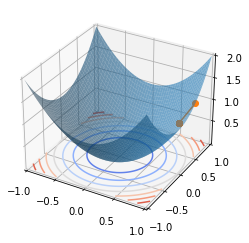

In [13]:
### ваш код
plot_3d(fun, trace=trace)

(может потребоваться запустить ячейку несколько раз, чтобы траекторию было лучше видно)

#### **Задание 6**

Реализовать цикл, запускающий процесс оптимизации (с визуализацией) несколько раз, чтобы проследить зависимость процесса от начального приближения.

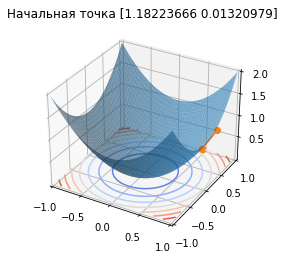

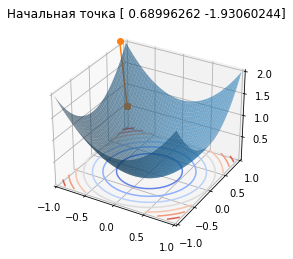

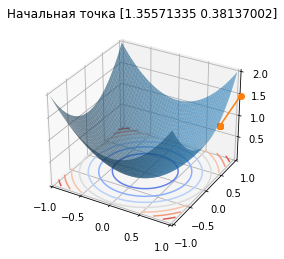

In [14]:
### ваш код
for i in range(3):
  trace = grad_descend(grad_fun)
  plot_3d(fun, trace=trace)
  plt.title(f"Начальная точка {trace[0]}")

Дать комментарии полученным результатам.

**Комментарии**

Коллиество шагов увеличитывается для достижения точки минимум при отдаление от начальной точки

#### **Задание 7**

Поэкспериментировать с длиной шага, задав значения из множества 0.01, 0.1, 0.5, 1.

Рекомендуется перед запуском градиентного спуска написать `np.random.seed(<число>)`, чтобы все запуски были из одного начального приближения.

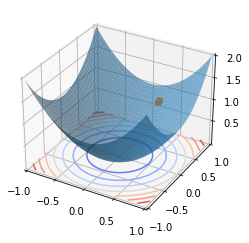

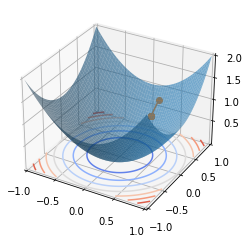

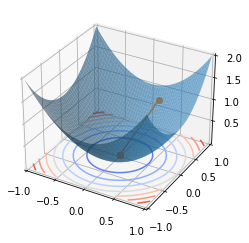

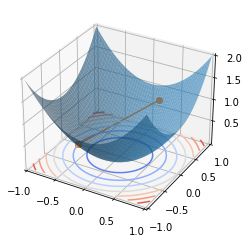

In [15]:
### ваш код
steps = [0.01, 0.1, 0.5, 1]

for step in steps :
  np.random.seed(0)
  trace = grad_descend(grad_fun, step)
  plot_3d(fun, trace=trace)

Дать комментарии полученным результатам.

**Комментарии**

При слишком малых значениях шага есть шанс недойти до минимума или при больших шагах его перескочить 

#### **Задание 8**
Оптимизировать функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага, равную 0.1, 0.2, 0.5

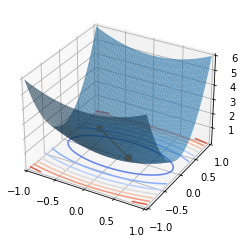

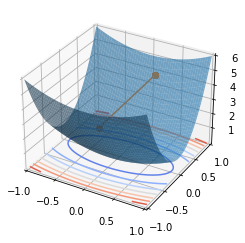

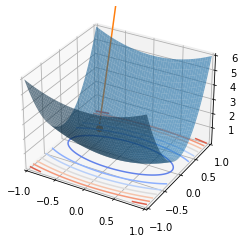

In [17]:
### ваш код

fun = lambda x1, x2: x1**2 + (x2**2)*5
grad_fun = lambda x1, x2, с1=1, c2=5: np.array([2*x1*с1,2*x2*c2])

steps = [0.1, 0.2, 0.5]

for step in steps: 
  np.random.seed(100)
  trace = grad_descend(grad_fun, step)
  plot_3d(fun, trace=trace)

Дать комментарии полученным результатам.

**Коментарии** 

При слишком малых значениях шага есть шанс недойти до минимума или при больших шагах его перескочить 

При различных коэфицентах функции сложнее подобрать грандиентный спуск из-за этого возрастает сложность оптимизации

Функцию с различающимися по величине коэффициентами сложнее оптимизировать. Именно поэтому рекомендуется нормировать данные перед обучением модели, чтобы избежать таких колебаний при оптимизации.